In [5]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
# Load dataset and create version in dataframe format
xr_data=xr.load_dataset("results_stacked_hh.nc")
df=xr_data.to_dataframe().reset_index()
df['log_z0']=np.log(df['z0'].values)
xr_data

<xarray.Dataset> Size: 57kB
Dimensions:                      (sample: 20, case_index: 182)
Coordinates:
  * sample                       (sample) int64 160B 0 1 2 3 4 ... 16 17 18 19
    k_b                          (sample) float64 160B 0.1309 0.2189 ... 0.06745
    ss_alpha                     (sample) float64 160B 1.15 1.234 ... 1.125
    wind_farm                    (case_index) <U22 16kB 'hr_blh_800m' ... 'vw...
    flow_case                    (case_index) float64 1kB 0.0 1.0 ... 14.0 15.0
Dimensions without coordinates: case_index
Data variables:
    power_err_norm               (sample, case_index) float64 29kB 0.1654 ......
    wind_speed                   (case_index) float64 1kB 9.947 9.971 ... 12.97
    wind_direction               (case_index) float64 1kB 14.98 9.983 ... 270.0
    turbulence_intensity         (case_index) float64 1kB 0.06973 ... 0.04089
    potential_temperature        (case_index) float64 1kB 20.45 20.45 ... 19.48
    z0                           (case_index) float32 728B 0.00209 ... 0.0002
    LMO                          (case_index) float32 728B 1e+05 1e+05 ... 1e+05
    ABL_height                   (case_index) float32 728B 800.0 800.0 ... 350.0
    capping_inversion_strength   (case_index) float32 728B 2.0 2.0 ... 2.0 2.0
    capping_inversion_thickness  (case_index) float32 728B 300.0 300.0 ... 300.0

In [7]:
# in dataframe format
df

,sample,case_index,power_err_norm,wind_speed,wind_direction,turbulence_intensity,potential_temperature,z0,LMO,ABL_height,capping_inversion_strength,capping_inversion_thickness,k_b,ss_alpha,wind_farm,flow_case,log_z0
0,0,0,0.165420,9.946975,14.983102,0.069730,20.446933,0.002090,100000.0,800.0,2.0,300.0,0.130936,1.150372,hr_blh_800m,0.0,-6.170591
1,0,1,0.121928,9.971009,9.983315,0.089637,20.454332,0.020800,100000.0,800.0,2.0,300.0,0.130936,1.150372,hr_blh_800m,1.0,-3.872802
2,0,2,0.174487,9.952359,4.983150,0.078817,20.449933,0.006864,100000.0,800.0,2.0,300.0,0.130936,1.150372,hr_blh_800m,2.0,-4.981465
3,0,3,0.281037,9.955688,-0.016862,0.075104,20.448632,0.004365,100000.0,800.0,2.0,300.0,0.130936,1.150372,hr_blh_800m,3.0,-5.434137
4,0,4,0.304077,9.950229,-5.016874,0.075284,20.448632,0.004467,100000.0,800.0,2.0,300.0,0.130936,1.150372,hr_blh_800m,4.0,-5.411038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3635,19,177,0.230447,12.965957,269.993759,0.050025,19.475408,0.000200,100000.0,1250.0,2.0,300.0,0.067449,1.125072,vwf_22mw_5x_5y,11.0,-8.517193
3636,19,178,0.258090,12.981516,269.993522,0.050533,19.475408,0.000200,100000.0,2000.0,2.0,300.0,0.067449,1.125072,vwf_22mw_5x_5y,12.0,-8.517193
3637,19,179,0.217237,12.983409,269.950750,0.025921,19.624398,0.000200,100000.0,150.0,2.0,300.0,0.067449,1.125072,vwf_22mw_5x_5y,13.0,-8.517193
3638,19,180,0.226565,12.972423,269.985570,0.035640,19.496860,0.000200,100000.0,250.0,2.0,300.0,0.067449,1.125072,vwf_22mw_5x_5y,14.0,-8.517193


EDA

Distribution of errors for all samples:
- Hornsrev and nysted wind farm cases seem to have a lower error
- Significantly higher error for the Virtual Wind Farm cases with larger rated power, despite normalizing power errors by the rated power

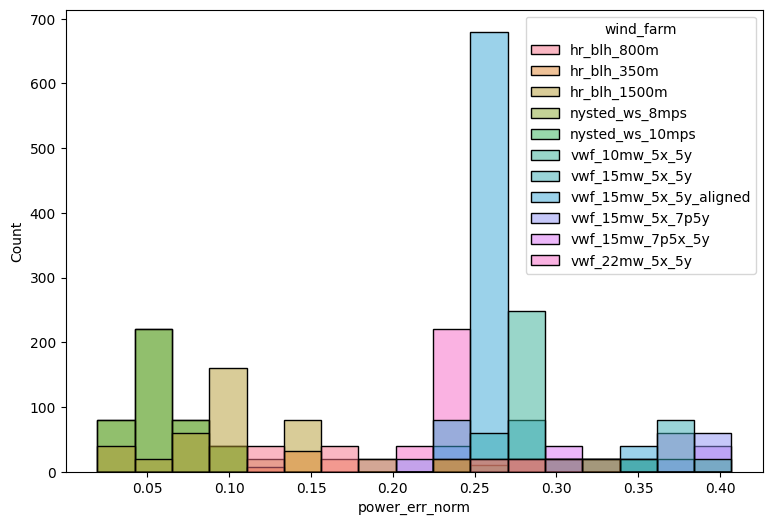

In [8]:
plt.figure(figsize=(9,6))
ax=sns.histplot(df,x="power_err_norm",hue="wind_farm")

Looking at relationships between features and target variables

/tmp/ipykernel_29096/4063331253.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap("tab10", len(unique_labels))  # or use seaborn color_palette


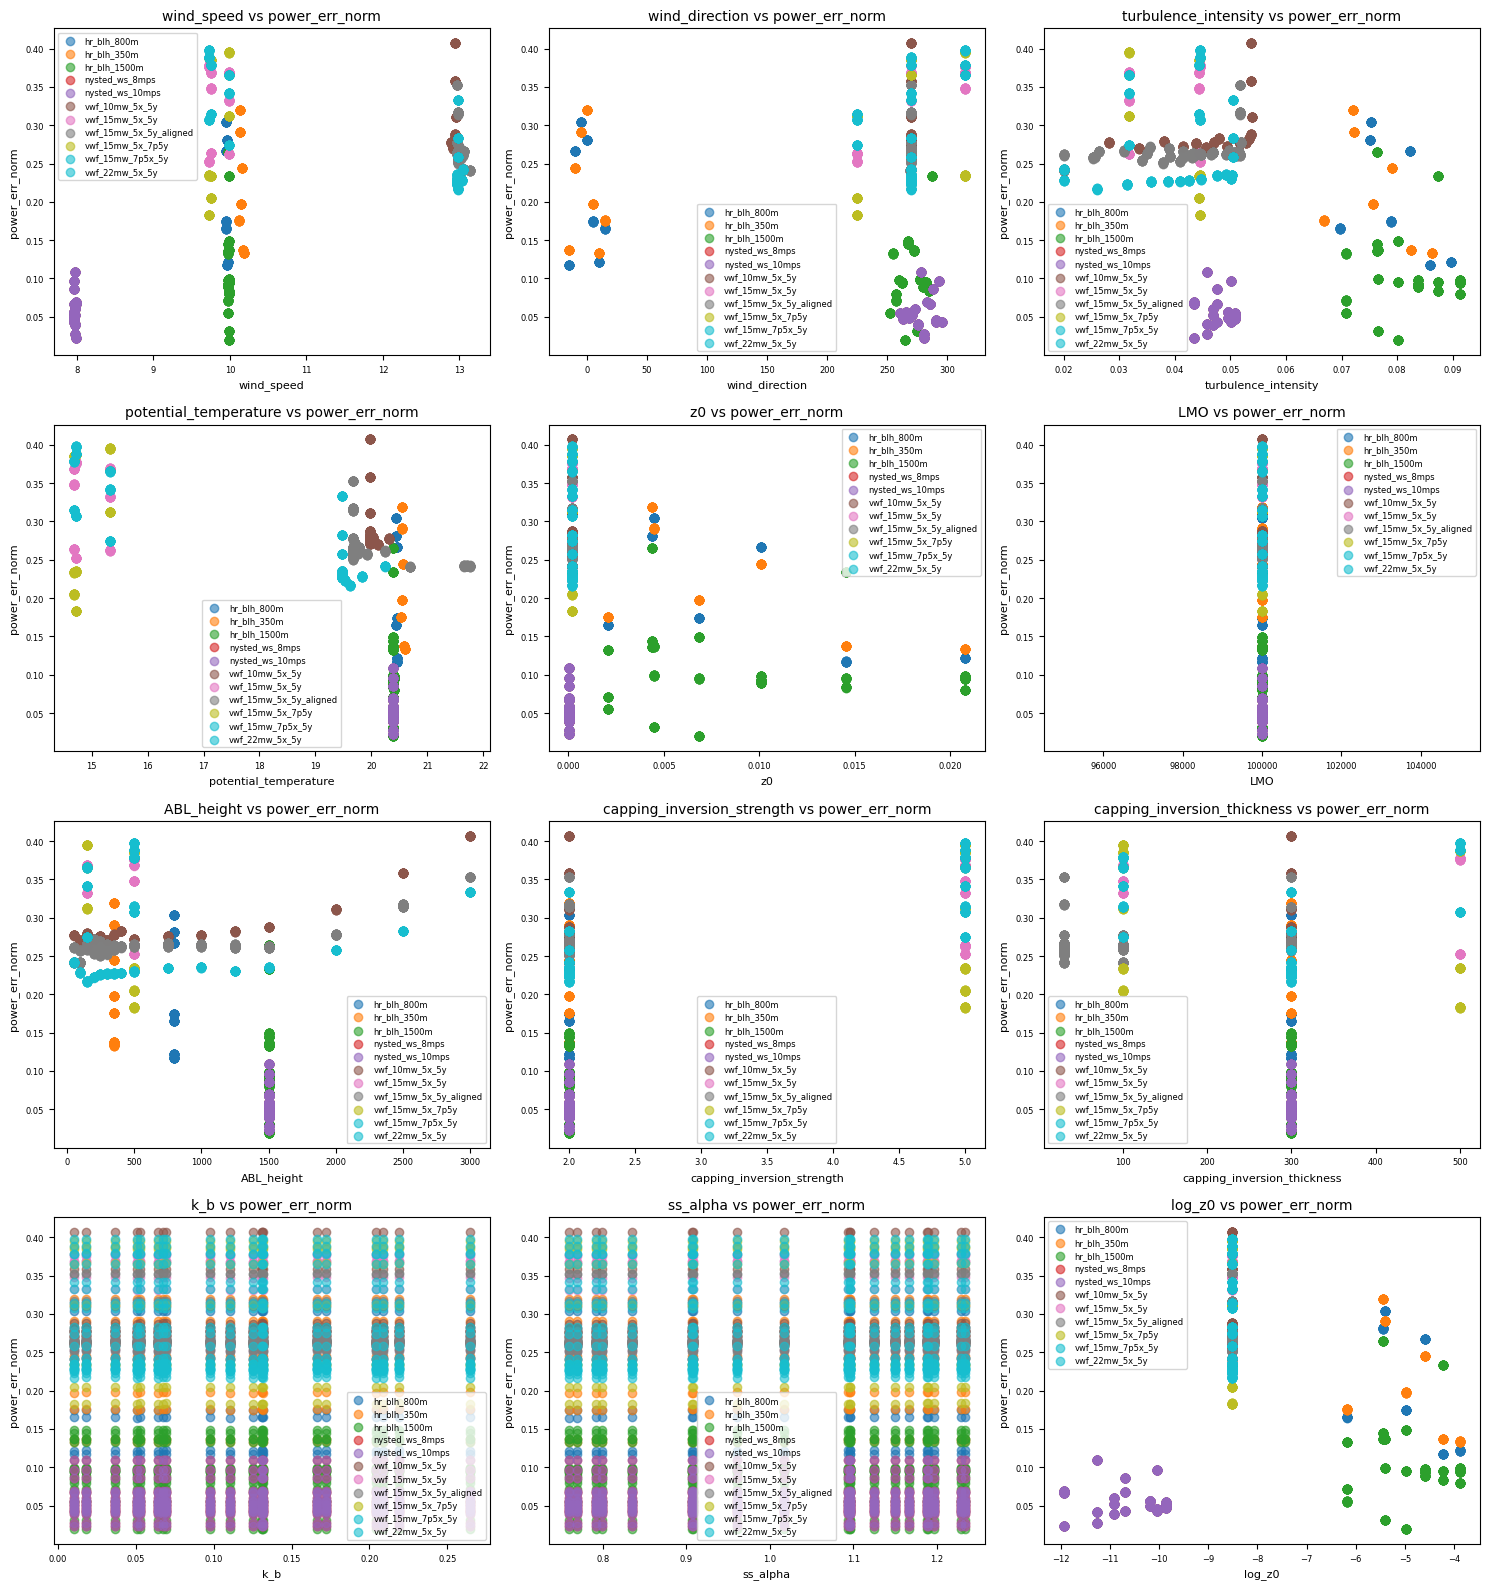

In [9]:
def plot_feature_vs_target(features, target, target_name, hue=None):
    """
    Plots scatter plots of all features against a specified target variable,
    with optional hue-based coloring.

    Parameters:
    - features: DataFrame of features.
    - target: Series of target values.
    - target_name: Label for the target.
    - hue: Optional categorical Series aligned with features/target for coloring.
    """
    n_features = len(features.columns)
    n_cols = 3
    n_rows = (n_features // n_cols) + (n_features % n_cols > 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten()

    # Define color palette
    if hue is not None:
        unique_labels = hue.unique()
        palette = plt.cm.get_cmap("tab10", len(unique_labels))  # or use seaborn color_palette
        color_dict = {label: palette(i) for i, label in enumerate(unique_labels)}

    for i, feature in enumerate(features.columns):
        ax = axes[i]
        if hue is None:
            ax.scatter(features[feature], target, alpha=0.6)
        else:
            for label in unique_labels:
                mask = hue == label
                ax.scatter(features[feature][mask], target[mask], 
                           alpha=0.6, label=str(label), color=color_dict[label])
            ax.legend(fontsize=6)

        ax.set_title(f'{feature} vs {target_name}', fontsize=10)
        ax.set_xlabel(feature, fontsize=8)
        ax.set_ylabel(target_name, fontsize=8)
        ax.tick_params(axis='both', which='major', labelsize=6)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    
features = df.drop(['wind_farm', 'flow_case','sample', 'case_index','power_err_norm'], axis=1)
target = df['power_err_norm']
hue = df['wind_farm']  # or any other categorical variable

plot_feature_vs_target(features, target, 'power_err_norm', hue=hue)

Correlation between variables

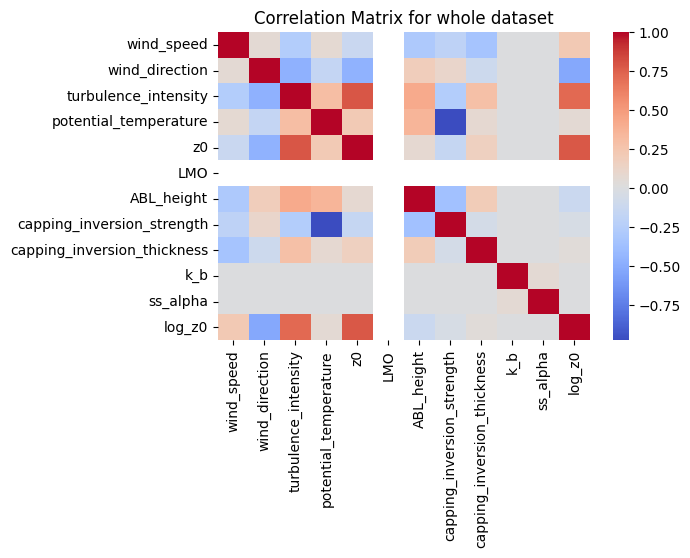

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(features.corr(),annot=False,cmap='coolwarm')
plt.title(f'Correlation Matrix for whole dataset')
plt.show()

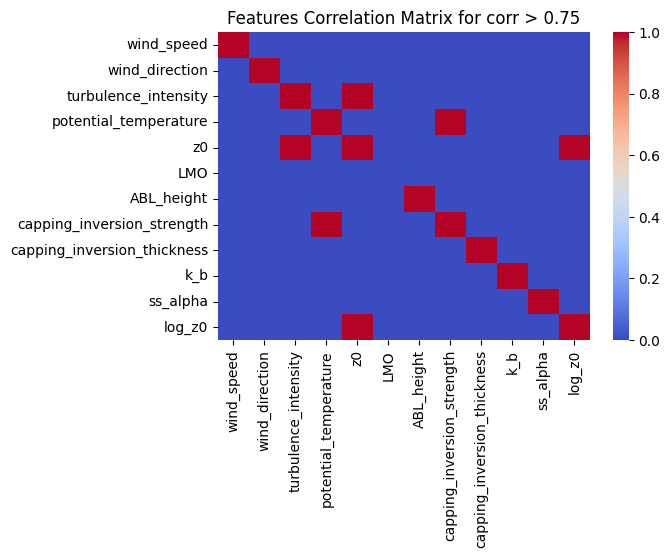

In [11]:
# Seeing whether there are features with a correlation beyond a certain threshold
thresh=0.75
corr_matrix = features.corr()
high_corr = corr_matrix.abs() > thresh

plt.figure(figsize=(6,4))
sns.heatmap(high_corr, annot=False, cmap='coolwarm')
plt.title(f'Features Correlation Matrix for corr > {thresh}')
plt.show()